# Association Rules - 360DIGITMG

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. ... In contrast with sequence mining, association rule learning typically does not consider the order of items either within a transaction or across transactions.

Apriori is part of the association rule learning algorithms, which sit under the unsupervised branch of Machine Learning.Apriori does not require us to provide a target variable for the model. Instead, the algorithm identifies relationships between data points subject to our specified constraints.

Support
The first step for us and the algorithm is to find frequently bought items. It is a straightforward calculation that is based on frequency.
Support(A) = Transactions(A) / Total Transactions

Confidence
Now that we have identified frequently bought items let’s calculate confidence. This will tell us how confident (based on our data) we can be that an item will be purchased, given that another item has been purchased.
Confidence(A→B) = Probability(A & B) / Support(A)

Lift
Given that different items are bought at different frequencies, how do we know that eggs and bacon really do have a strong association, and how do we measure it? You will be glad to hear that we have a way to evaluate this objectively using lift.
There are multiple ways to express the formula to calculate lift.
1) Lift(A→B) = Probability(A & B) / (Support(A) * Support(B))
2) Lift(A→B) = Confidence(A & B) / Support(B)

# Steps Involved in Apriori Algorithm
1. Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).
2. Extract all the subsets having higher value of support than minimum threshold.
3. Select all the rules from the subsets with confidence value higher than minimum threshold.
4. Order the rules by descending order of Lift.

# Association Rules Problem No. 2
The Departmental Store, has gathered the data of the products it sells on a Daily basis.
Using Association Rules concepts, provide the insights on the rules and the plots.



Business Objective: 

In [1]:
# Importing the Requ
import pandas as pd # for Data Manipulation
from mlxtend.frequent_patterns import apriori, association_rules # for Apriori algorithm we use mlxtend 
import matplotlib.pyplot as plt # Data Vizualization
from collections import Counter # ,OrderedDict

In [2]:
# Loading the data set using with open because dataset is into unstruture format
groceries = []
with open("groceries.csv") as f:
    groceries = f.read()


In [3]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [4]:
# Making a list of all separate transactions
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))
all_groceries_list = [i for item in groceries_list for i in item]
all_groceries_list

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical fru

In [5]:
# counting the product how many time parchase
item_frequencies = Counter(all_groceries_list)
item_frequencies

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

In [6]:
# after sorting
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])
item_frequencies

[('baby food', 1),
 ('sound storage medium', 1),
 ('', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8),
 ('salad dressing', 8),
 ('whisky', 8),
 ('liqueur', 9),
 ('rubbing alcohol', 10),
 ('hair spray', 11),
 ('frozen fruits', 12),
 ('cream', 13),
 ('honey', 15),
 ('decalcifier', 15),
 ('organic products', 16),
 ('specialty vegetables', 17),
 ('ready soups', 18),
 ('flower soil/fertilizer', 19),
 ('prosecco', 20),
 ('cocoa drinks', 22),
 ('organic sausage', 22),
 ('pudding powder', 23),
 ('tidbits', 23),
 ('cooking chocolate', 25),
 ('soap', 26),
 ('bathroom cleaner', 27),
 ('cookware', 27),
 ('potato products', 28),
 ('fish', 29),
 ('snack products', 30),
 ('nut snack', 31),
 ('artif. sweetener', 32),
 ('canned fruit', 32),
 ('syrup', 32),
 ('nuts/prunes', 33),
 ('abrasive cleaner', 35),
 ('skin care', 35),
 ('specialty fat', 36),
 ('tea', 38),
 ('brandy', 41),
 ('

In [7]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
frequencies

[2513,
 1903,
 1809,
 1715,
 1372,
 1087,
 1072,
 1032,
 969,
 924,
 875,
 814,
 792,
 785,
 764,
 744,
 711,
 705,
 638,
 624,
 580,
 576,
 571,
 567,
 545,
 524,
 516,
 515,
 488,
 473,
 422,
 414,
 390,
 378,
 372,
 368,
 365,
 333,
 329,
 327,
 327,
 324,
 305,
 299,
 294,
 279,
 279,
 276,
 275,
 269,
 256,
 256,
 254,
 246,
 241,
 241,
 229,
 220,
 207,
 189,
 189,
 187,
 176,
 174,
 174,
 173,
 171,
 170,
 168,
 163,
 160,
 148,
 148,
 140,
 130,
 128,
 118,
 115,
 112,
 110,
 109,
 106,
 106,
 106,
 103,
 102,
 101,
 101,
 93,
 91,
 90,
 89,
 89,
 88,
 84,
 84,
 83,
 82,
 80,
 79,
 78,
 75,
 73,
 71,
 68,
 67,
 64,
 64,
 60,
 59,
 57,
 56,
 55,
 54,
 54,
 53,
 51,
 50,
 50,
 50,
 45,
 44,
 42,
 42,
 41,
 41,
 38,
 36,
 35,
 35,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 28,
 27,
 27,
 26,
 25,
 23,
 23,
 22,
 22,
 20,
 19,
 18,
 17,
 16,
 15,
 15,
 13,
 12,
 11,
 10,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 4,
 4,
 2,
 1,
 1,
 1]

In [8]:
items = list(reversed([i[0] for i in item_frequencies]))
items

['whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese ',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'berries',
 'hamburger meat',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'frozen meals',
 'misc. beverages',
 'oil',
 'butter milk',
 'specialty bar',
 'ham',
 'beverages',
 'meat',
 'ice cream',
 'sliced cheese',
 'hard cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'red/blush wine',
 'detergent',
 'white wine',
 'pickled vegetables',
 'baking powder',
 'semi-finished brea

<ipython-input-9-22424e0e9049>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')


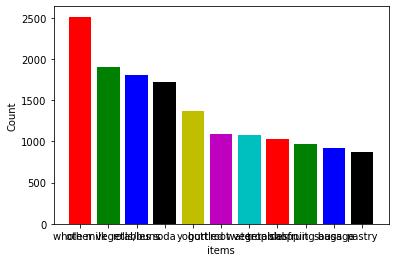

In [9]:
# barplot of top 10 products
plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')
plt.xticks(list(range(0, 11), ), items[0:11])
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

In [10]:

# Creating Data Frame for the transactions data
groceries_series = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835, :] # removing the last empty transaction
groceries_series

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [11]:

groceries_series.columns = ["transactions"]

# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')
X 

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Checking the Most Frequent item sets based on min support 
frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
526,0.007931,"(whole milk, tropical fruit, whipped/sour cream)"
527,0.015150,"(whole milk, tropical fruit, yogurt)"
528,0.010880,"(whole milk, whipped/sour cream, yogurt)"
529,0.007829,"(whole milk, other vegetables, root vegetables..."


In [13]:
# arranging the support in desending oredr
frequent_itemsets.sort_values('support', ascending = False, inplace = True)


<ipython-input-14-80a10a4d44e1>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')


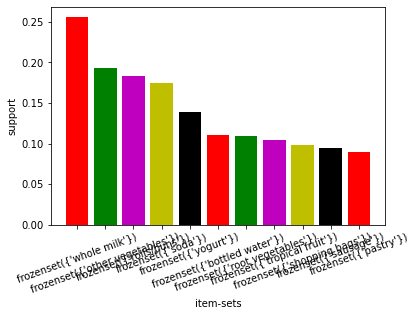

In [14]:
# now we ploting the bar plot for checking the support  with item sets 
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()


In [15]:
# If we are interested in rules according to a different metric of interest, we can simply adjust the metric 
# and min_threshold arguments .
# Eg.  if you are only interested in rules that have a lift score of >= 1, you would do the following
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10) # arranging the lift in desending order

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1170,"(whole milk, tropical fruit)","(other vegetables, yogurt)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
1175,"(other vegetables, yogurt)","(whole milk, tropical fruit)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
1093,"(root vegetables, yogurt)","(whole milk, other vegetables)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638
1088,"(whole milk, other vegetables)","(root vegetables, yogurt)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
792,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
793,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
1173,"(tropical fruit, other vegetables)","(whole milk, yogurt)",0.035892,0.056024,0.007626,0.212465,3.792358,0.005615,1.198645
1172,"(whole milk, yogurt)","(tropical fruit, other vegetables)",0.056024,0.035892,0.007626,0.136116,3.792358,0.005615,1.116016
1053,(root vegetables),"(beef, other vegetables)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1048,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123


In [ ]:
################################# Extra part ###################################
# arranging the list using function
def to_list(i):
    return (sorted(list(i)))


In [ ]:
# adding the antecedents and consequents  rules
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X

In [ ]:
ma_X = ma_X.apply(sorted)
ma_X

In [ ]:
rules_sets = list(ma_X)
rules_sets

In [ ]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

In [ ]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [ ]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]
rules_no_redudancy

In [ ]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)
rules_no_redudancy.to_csv("grocerieslArules.csv",encoding="utf 8")

import os
os.getcwd()
